In [2]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
import base64
from io import BytesIO
from PIL import Image

def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Base64 string
    """
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

# Function to create the prompt with text and image
def prompt_func(data):
    if isinstance(data, str):
        print(data)

    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/png;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]

# Load and convert the image to base64
file_path = "/workspaces/PnP_Pl/colcon_ws/src/LLM_Control/llm_image_analyser/llm_image_analyser/kuka_img.png"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
image = f"data:image/png;base64,{image_b64}"
# Invoke the chain with the text and image data
# query_chain = chain.invoke(
#     {"text": "Describe image", "image": image_b64}
# )

# print(query_chain)

In [3]:
import json
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage

llm = ChatOllama(model="llava")

qa_prompt = ChatPromptTemplate.from_messages([
            # ("system", "Nice Assistant"),
            ("human", "{input}")
        ])

messages=[SystemMessage(content='Nice Assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content="[{'type': 'image_url', 'image_url': ''}, {'type': 'text', 'text': 'Describe this image'}]", additional_kwargs={}, response_metadata={})]

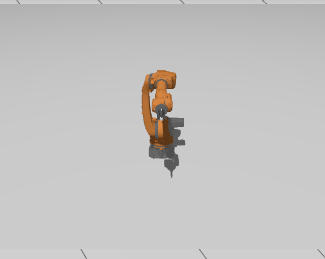

In [10]:
file_path = "/workspaces/PnP_Pl/colcon_ws/src/LLM_Control/llm_image_analyser/llm_image_analyser/kuka_img.png"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
image = f"data:image/png;base64,{image_b64}"

input = [{"type": "image_url", "image_url": image}, {"type": "text", "text": "Describe this image"}]
val = qa_prompt.invoke({"input": input})
print(val)

In [7]:
prompt_func({"text": "Describe image", "image": "image_b64"})

[HumanMessage(content=[{'type': 'image_url', 'image_url': 'data:image/png;base64,image_b64'}, {'type': 'text', 'text': 'Describe image'}], additional_kwargs={}, response_metadata={})]

In [9]:
chain = prompt_func | llm | StrOutputParser()
chain.invoke({"text": "Describe image", "image": image_b64})

" The image is a screenshot from a computer-generated environment, possibly within a simulation or video game. It features an indoor setting with a flat floor and walls. There's a single object in the scene: a small, orange robotic arm. This robot appears to have a few jointed segments and a grasping mechanism at its end. The robot is standing still, with no visible movement or interaction with other objects. The image has a low-resolution appearance, typical of older video game graphics or an early version of a simulation. There are no texts or additional elements in the image that would provide context or information about the scene. "